### **Necessary Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import PIL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
image1 = Image.open('/content/drive/MyDrive/HA3_CV_dataset/Leaves/Black spot/b (14).png')
image2 = Image.open('/content/drive/MyDrive/HA3_CV_dataset/Leaves/greening/g (102).png')
print('Image-1 shape: ',image1.size)
print('Image-2 shape: ',image2.size)
print('Image-1 mode: ', image1.mode)
print('Image-2 mode: ', image2.mode)

Image-1 shape:  (256, 256)
Image-2 shape:  (256, 256)
Image-1 mode:  RGB
Image-2 mode:  RGB


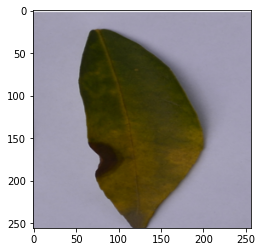

In [ ]:
plt.imshow(image1)

Here both the images are of same size but what if any of the image is not of same size, hence we need to resize all images to 256 x 256

In [ ]:
img_w, img_h = 256, 256

### **For data-generation part**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, array_to_img, load_img

In [ ]:
train_data = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip=True,
                                validation_split=0.2)
train_generator = train_data.flow_from_directory('/content/drive/MyDrive/HA3_CV_dataset/Leaves/',
                                                  target_size = (img_h, img_w),
                                                  batch_size=16,
                                                  shuffle = True,
                                                  class_mode = 'categorical',
                                                  subset ="training")                                                 
validation_generator = train_data.flow_from_directory('/content/drive/MyDrive/HA3_CV_dataset/Leaves/',
                                                      target_size=(img_h, img_w),
                                                      batch_size=16,
                                                      shuffle = True,
                                                      class_mode='categorical',
                                                      subset ="validation")

Found 490 images belonging to 5 classes.
Found 119 images belonging to 5 classes.


We have completed image preprocessing and now we are ready for Convolutional Architecture

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Dropout, Flatten

### **Modelling part**

**Experiment:** Model with 3 conv2D and Maxpooling2D layers

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=5, strides=1, padding="Same", activation='relu', input_shape=(img_h,img_w,3)))
model1.add(MaxPooling2D(padding='Same'))

model1.add(Conv2D(32, kernel_size=5, strides=1, padding="Same", activation='relu'))
model1.add(MaxPooling2D(padding='Same'))

model1.add(Conv2D(64, kernel_size=5, strides=1, padding="Same", activation='relu'))
model1.add(MaxPooling2D(padding='Same'))

model1.add(Flatten())
model1.add(Dense(1024,activation="relu"))
model1.add(Dropout(0.3))
model1.add(Dense(5,activation="softmax"))


model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

In [ ]:
history=model1.fit_generator(
    train_generator,
    steps_per_epoch = 490//16, 
    epochs=30,
    validation_data = validation_generator,
    validation_steps = 119//16
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
30/30 [==============================] - 10s 346ms/step - loss: 1.0525 - accuracy: 0.5063 - val_loss: 1.2161 - val_accuracy: 0.4464
Epoch 2/30
30/30 [==============================] - 10s 347ms/step - loss: 1.0442 - accuracy: 0.5359 - val_loss: 1.1302 - val_accuracy: 0.5089
Epoch 3/30
30/30 [==============================] - 10s 350ms/step - loss: 1.1486 - accuracy: 0.4557 - val_loss: 1.3049 - val_accuracy: 0.3750
Epoch 4/30
30/30 [==============================] - 10s 348ms/step - loss: 1.0585 - accuracy: 0.5316 - val_loss: 1.2427 - val_accuracy: 0.4554
Epoch 5/30
30/30 [==============================] - 10s 349ms/step - loss: 0.9756 - accuracy: 0.5570 - val_loss: 1.2612 - val_accuracy: 0.3393
Epoch 6/30
30/30 [==============================] - 10s 349ms/step - loss: 0.9490 - accuracy: 0.5823 - val_loss: 1.1442 - val_accuracy: 0.4107
Epoch 7/30
30/30 [==============================] - 10s 346ms/step - loss: 0.8177 - accuracy: 0.6350 - val_loss: 0.9511 - val_accuracy: 0.5357

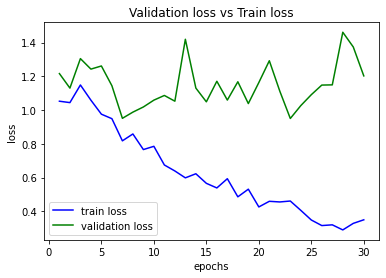

In [ ]:
train_l = history.history['loss']
val_l = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, train_l, 'b-', label='train loss')
plt.plot(epochs, val_l, 'g-', label='validation loss')
plt.title('Validation loss vs Train loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

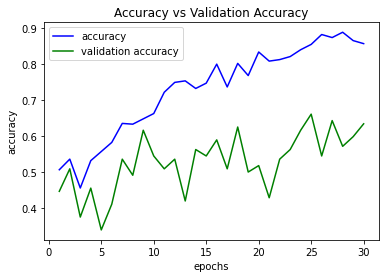

In [ ]:
train_l = history.history['accuracy']
val_l = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, train_l, 'b-', label='accuracy')
plt.plot(epochs, val_l, 'g-', label='validation accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

**Observstion:** As we are not getting smooth accuracy plots, let's try with signoid activation function in last layer

In [ ]:
model_sig = Sequential()
model_sig.add(Conv2D(32, kernel_size=5, strides=1, padding="Same", activation='relu', input_shape=(img_h,img_w,3)))
model_sig.add(MaxPooling2D(padding='Same'))

model_sig.add(Conv2D(32, kernel_size=5, strides=1, padding="Same", activation='relu'))
model_sig.add(MaxPooling2D(padding='Same'))

model_sig.add(Conv2D(64, kernel_size=5, strides=1, padding="Same", activation='relu'))
model_sig.add(MaxPooling2D(padding='Same'))

model_sig.add(Flatten())
model_sig.add(Dense(1024,activation="relu"))
model_sig.add(Dropout(0.3))
model_sig.add(Dense(5,activation="sigmoid"))


model_sig.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history_sig=model_sig.fit_generator(
    train_generator,
    steps_per_epoch = 490//16, 
    epochs=15,
    validation_data = validation_generator,
    validation_steps = 119//16
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
30/30 [==============================] - 11s 351ms/step - loss: 2.6328 - accuracy: 0.3303 - val_loss: 1.2742 - val_accuracy: 0.3571
Epoch 2/15
30/30 [==============================] - 10s 342ms/step - loss: 1.1758 - accuracy: 0.4572 - val_loss: 1.1958 - val_accuracy: 0.3304
Epoch 3/15
30/30 [==============================] - 10s 337ms/step - loss: 1.0656 - accuracy: 0.5190 - val_loss: 1.2358 - val_accuracy: 0.4821
Epoch 4/15
30/30 [==============================] - 10s 336ms/step - loss: 1.0741 - accuracy: 0.4657 - val_loss: 1.3591 - val_accuracy: 0.3929
Epoch 5/15
30/30 [==============================] - 10s 337ms/step - loss: 1.1504 - accuracy: 0.4495 - val_loss: 1.2585 - val_accuracy: 0.3125
Epoch 6/15
30/30 [==============================] - 10s 337ms/step - loss: 1.4806 - accuracy: 0.4893 - val_loss: 1.3130 - val_accuracy: 0.4464
Epoch 7/15
30/30 [==============================] - 10s 336ms/step - loss: 1.0975 - accuracy: 0.4548 - val_loss: 1.2160 - val_accuracy: 0.4196

**Observstion:** Here we are getting validation loss higher than training loss this might be showing the problem of over-fitting data. Now that can be due to many reasons but here it should be due to less number of samples in comaprision with features. 

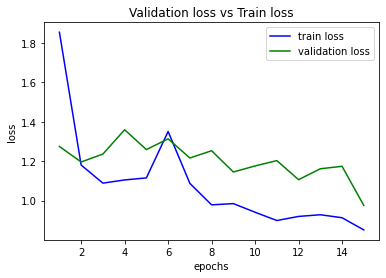

In [ ]:
train_l = history_sig.history['loss']
val_l = history_sig.history['val_loss']
epochs = range(1,16)
plt.plot(epochs, train_l, 'b-', label='train loss')
plt.plot(epochs, val_l, 'g-', label='validation loss')
plt.title('Validation loss vs Train loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

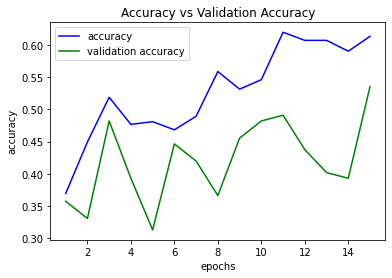

In [ ]:
train_l = history_sig.history['accuracy']
val_l = history_sig.history['val_accuracy']
epochs = range(1,16)
plt.plot(epochs, train_l, 'b-', label='accuracy')
plt.plot(epochs, val_l, 'g-', label='validation accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

**Experiment:** Trying alpha values as learning rate for optimizer instead of adam optimizer. 

Alphas = [0.0001 , 0.001 , 0.01 , 0.1 , 1]

Also we had tried model with 2 conv2D and maxpooling2D layers.

In [ ]:
learning_rate = [0.0001,0.001,0.01,0.1,1]
for alpha in learning_rate:
  model2 = Sequential()
  model2.add(Conv2D(32, kernel_size=5, strides=1, padding="Same", activation='relu', input_shape=(img_h,img_w,3)))
  model2.add(MaxPooling2D(padding='Same'))

  model2.add(Conv2D(64, kernel_size=5, strides=1, padding="Same", activation='relu'))
  model2.add(MaxPooling2D(padding='Same'))

  model2.add(Flatten())
  model2.add(Dense(1024,activation="relu"))
  model2.add(Dropout(0.3))
  model2.add(Dense(5,activation="softmax"))

  opti = tf.keras.optimizers.SGD(learning_rate=alpha)
  model2.compile(optimizer=opti,loss="categorical_crossentropy",metrics=["accuracy"])
  print('For learning rate = ', alpha)
  model2.fit_generator(
                      train_generator,
                      steps_per_epoch = 490//16, 
                      epochs=10,
                      validation_data = validation_generator,
                      validation_steps = 119//16)

For learning rate =  0.0001


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
30/30 [==============================] - 11s 353ms/step - loss: 1.5222 - accuracy: 0.2822 - val_loss: 1.4276 - val_accuracy: 0.2679
Epoch 2/10
30/30 [==============================] - 10s 348ms/step - loss: 1.4204 - accuracy: 0.3089 - val_loss: 1.3749 - val_accuracy: 0.3125
Epoch 3/10
30/30 [==============================] - 10s 346ms/step - loss: 1.4063 - accuracy: 0.3119 - val_loss: 1.3530 - val_accuracy: 0.3214
Epoch 4/10
30/30 [==============================] - 10s 345ms/step - loss: 1.3817 - accuracy: 0.3407 - val_loss: 1.3651 - val_accuracy: 0.2321
Epoch 5/10
30/30 [==============================] - 10s 346ms/step - loss: 1.3954 - accuracy: 0.3282 - val_loss: 1.3435 - val_accuracy: 0.3036
Epoch 6/10
30/30 [==============================] - 10s 346ms/step - loss: 1.3874 - accuracy: 0.3423 - val_loss: 1.3305 - val_accuracy: 0.3214
Epoch 7/10
30/30 [==============================] - 10s 344ms/step - loss: 1.3385 - accuracy: 0.4016 - val_loss: 1.3446 - val_accuracy: 0.3393

Plotting Accuracy (considering highest accuracy of 10 epochs) and validation accuracy (considering val_acc of respective accuracy)

Text(0.5, 1.0, 'Accuracy for different learning rates')

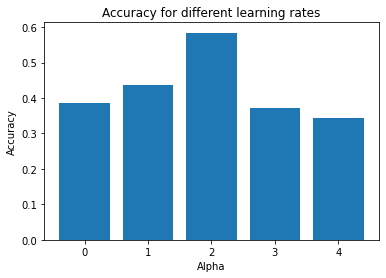

In [ ]:
Accuracy = [0.3860, 0.4372, 0.5840, 0.3728, 0.3428]
Val_acc = [0.3125, 0.4196, 0.3839, 0.3304, 0.3304]
alpha = range(0,5)
plt.bar(alpha, Accuracy)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy for different learning rates')

Text(0.5, 1.0, 'Validation accuracy for different learning rates')

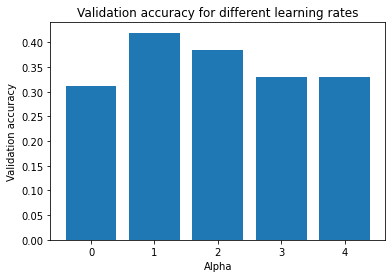

In [ ]:
plt.bar(alpha, Val_acc)
plt.xlabel('Alpha')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy for different learning rates')

**Experiment:** To avoid overfitting let's try to increase the Dropout percentage by 20%

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=5, strides=1, padding="Same", activation='relu', input_shape=(img_h,img_w,3)))
model3.add(MaxPooling2D(padding='Same'))

model3.add(Conv2D(64, kernel_size=5, strides=1, padding="Same", activation='relu'))
model3.add(MaxPooling2D(padding='Same'))

model3.add(Flatten())
model3.add(Dense(1024,activation="relu"))
model3.add(Dropout(0.5))
model3.add(Dense(5,activation="sigmoid"))


model3.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history_dropout = model3.fit_generator(
                                      train_generator,
                                      steps_per_epoch = 490//16, 
                                      epochs=15,
                                      validation_data = validation_generator,
                                      validation_steps = 119//16)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
30/30 [==============================] - 11s 357ms/step - loss: 17.1107 - accuracy: 0.2773 - val_loss: 1.3198 - val_accuracy: 0.4107
Epoch 2/15
30/30 [==============================] - 10s 344ms/step - loss: 1.4086 - accuracy: 0.3483 - val_loss: 1.3501 - val_accuracy: 0.3571
Epoch 3/15
30/30 [==============================] - 10s 347ms/step - loss: 1.1883 - accuracy: 0.4610 - val_loss: 1.2203 - val_accuracy: 0.3750
Epoch 4/15
30/30 [==============================] - 10s 347ms/step - loss: 1.0996 - accuracy: 0.4769 - val_loss: 1.4612 - val_accuracy: 0.3393
Epoch 5/15
30/30 [==============================] - 10s 346ms/step - loss: 1.2838 - accuracy: 0.4381 - val_loss: 1.2427 - val_accuracy: 0.3929
Epoch 6/15
30/30 [==============================] - 10s 345ms/step - loss: 1.1260 - accuracy: 0.4792 - val_loss: 1.2267 - val_accuracy: 0.4196
Epoch 7/15
30/30 [==============================] - 10s 345ms/step - loss: 1.1132 - accuracy: 0.4719 - val_loss: 1.4523 - val_accuracy: 0.410

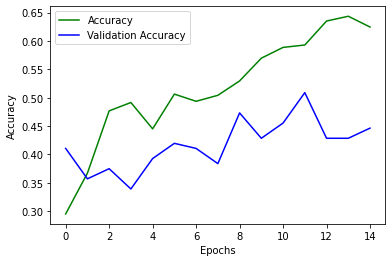

In [ ]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
epochs = range(0,15)
plt.plot(epochs, acc,'g-' ,label= 'Accuracy')
plt.plot(epochs, val_acc ,'b-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

**Observation:** Here we can see that accuracy curve turns out to be much better than previous results for both training as well as validation. 